<a href="https://colab.research.google.com/github/mjgrandell/Permanent-Magnet-Synchronous-Motors-Temperature-Prediction/blob/main/ESOF_3675_Project_Model_Finalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Model Finalization

Mark Grandell - 1101454

Jack Fiorot - 1104472

# Data Preprocessing

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#all imports
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, mean_absolute_error

In [ ]:
#import pandas, read csv file from drive and display first 10 rows of dataset
df = pd.read_csv('/content/drive/MyDrive/ESOF 3675 Project - Mark Grandell & Jack Fiorot/measures_v2.csv')

df.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


In [ ]:
#reorder columns
df = df[['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'torque', 'profile_id', 'stator_winding', 'stator_tooth', 'stator_yoke', 'pm']]

Preprocessing method 1: Fill missing values with Median

In [ ]:
#handle missing values
df1 = df
df1 = df1.fillna(df.median(axis = 0))

In [ ]:
#remove outliers
columns = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'torque', 'profile_id', 'stator_winding', 'stator_tooth', 'stator_yoke', 'pm']
Q1_1 = df1[columns].quantile(0.25)
Q3_1 = df1[columns].quantile(0.75)
IQR_1 = (Q3_1-Q1_1)
df1 = df1[~((df1[columns] < (Q1_1 - 1.5 * IQR_1)) |(df1[columns] > (Q3_1 + 1.5* IQR_1))).any(axis=1)]
df1 = df1.fillna(df1.median())

In [ ]:
#extracting independent and dependent variable
x1 = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'torque', 'profile_id']
y1 = ['stator_winding', 'stator_tooth', 'stator_yoke', 'pm']

In [ ]:
#split dataset into train and test set
x_train1, x_test1, y_train1, y_test1 = train_test_split(df1[x1],df1[y1],test_size = 0.3)

In [ ]:
#normalize the data
mm = MinMaxScaler() # 0 : 1
x_train1 = mm.fit_transform(x_train1)
x_test1 = mm.fit_transform(x_test1)

Preprocessing method 2: Remove rows with missing values or outliers

In [ ]:
#handle missing values
df2 = df
df2 = df2.dropna()

In [ ]:
#remove outliers
columns = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'torque', 'profile_id', 'stator_winding', 'stator_tooth', 'stator_yoke', 'pm']
Q1_2 = df2[columns].quantile(0.25)
Q3_2 = df2[columns].quantile(0.75)
IQR_2 = (Q3_2-Q1_2)
df2 = df2[~((df2[columns] < (Q1_2 - 1.5 * IQR_2)) |(df2[columns] > (Q3_2 + 1.5* IQR_2))).any(axis=1)]
df2 = df2.dropna()

In [ ]:
#extracting independent and dependent variable
x2 = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'torque', 'profile_id']
y2 = ['stator_winding', 'stator_tooth', 'stator_yoke', 'pm']

In [ ]:
#split dataset into train and test set
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2[x2],df2[y2],test_size = 0.3, random_state = 100)

In [ ]:
#normalize the data
x_train2 = mm.fit_transform(x_train2)
x_test2 = mm.fit_transform(x_test2)

"Raw Data" Preprocessing method: only normalize the data

In [ ]:
#extracting independent and dependent variable
x3 = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'torque', 'profile_id']
y3 = ['stator_winding', 'stator_tooth', 'stator_yoke', 'pm']

In [ ]:
#split dataset into train and test set
x_train3, x_test3, y_train3, y_test3 = train_test_split(df[x3],df[y3],test_size = 0.3, random_state = 100)

In [ ]:
#normalize the data
x_train3 = mm.fit_transform(x_train3)
x_test3 = mm.fit_transform(x_test3)

Preprocessing method 4: replace missing values with mode

In [ ]:
#handle missing values
df4 = df
df4 = df4.fillna(df.mode(axis = 0))

In [ ]:
#remove outliers
columns = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'torque', 'profile_id', 'stator_winding', 'stator_tooth', 'stator_yoke', 'pm']
Q1_4 = df4[columns].quantile(0.25)
Q3_4 = df4[columns].quantile(0.75)
IQR_4 = (Q3_4-Q1_4)
df4 = df4[~((df4[columns] < (Q1_4 - 1.5 * IQR_4)) |(df4[columns] > (Q3_4 + 1.5* IQR_4))).any(axis=1)]
df4 = df4.fillna(df4.mode())

In [ ]:
#extracting independent and dependent variable
x4 = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'torque', 'profile_id']
y4 = ['stator_winding', 'stator_tooth', 'stator_yoke', 'pm']

In [ ]:
#split dataset into train and test set
x_train4, x_test4, y_train4, y_test4 = train_test_split(df4[x4],df4[y4],test_size = 0.3)

In [ ]:
#normalize the data
x_train4 = mm.fit_transform(x_train4)
x_test4 = mm.fit_transform(x_test4)

Preprocessing method 5: exponential weighted moving average

In [ ]:
# EMA
df5 = df
df5.ewm(span=5, adjust=False).mean()

,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient,torque,profile_id,stator_winding,stator_tooth,stator_yoke,pm
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,19.850691,1.871008e-01,17.0,19.086670,18.293219,18.316547,24.554214
1,-0.409033,18.809638,-0.335304,0.001996,0.003148,-0.000043,19.850684,2.065397e-01,17.0,19.088577,18.293748,18.316017,24.548836
2,-0.419644,18.816015,-0.347704,0.002116,0.002529,0.000100,19.850675,1.965649e-01,17.0,19.088845,18.293864,18.319447,24.547455
3,-0.388771,18.822533,-0.337202,0.003445,0.001694,0.000749,19.850666,2.104775e-01,17.0,19.086907,18.293423,18.323242,24.549643
4,-0.416231,18.834033,-0.335559,0.003341,-0.020309,0.012894,19.850657,2.097172e-01,17.0,19.085446,18.292758,18.324382,24.554894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.184409,30.721253,0.784224,-0.000943,-2.000403,1.097433,23.993293,-3.887785e-59,71.0,45.316013,41.950742,38.664679,62.171289
1330812,-2.209167,30.721271,0.782449,0.000366,-2.000435,1.097479,23.985762,-2.785720e-59,71.0,45.290347,41.923469,38.661895,62.161741
1330813,-2.182882,30.721284,0.789938,0.001011,-2.000046,1.097907,23.982920,-1.996056e-59,71.0,45.264090,41.883919,38.658238,62.153957
1330814,-2.211421,30.721295,0.780989,0.002561,-2.000364,1.097170,23.989087,-1.430236e-59,71.0,45.240563,41.843353,38.657387,62.147112


In [ ]:
#extracting independent and dependent variable
x5 = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'torque', 'profile_id']
y5 = ['stator_winding', 'stator_tooth', 'stator_yoke', 'pm']

In [ ]:
#split dataset into train and test set
x_train5, x_test5, y_train5, y_test5 = train_test_split(df5[x5],df5[y5],test_size = 0.3, random_state = 100)

In [ ]:
#normalize the data
x_train5 = mm.fit_transform(x_train5)
x_test5 = mm.fit_transform(x_test5)

# Model 1: Linear Regression (LR)


In [ ]:
#make model
linreg = LinearRegression()

In [ ]:
#fit data to model
linreg.fit(x_train1, y_train1)
lr_pred1 = linreg.predict(x_test1)
linreg.fit(x_train2, y_train2)
lr_pred2 = linreg.predict(x_test2)
linreg.fit(x_train3, y_train3)
lr_pred3 = linreg.predict(x_test3)
linreg.fit(x_train4, y_train4)
lr_pred4 = linreg.predict(x_test4)

In [ ]:
#mean squared error calculation 
mse1 = mean_squared_error(y_test1, lr_pred1)
mse2 = mean_squared_error(y_test2, lr_pred2)
mse3 = mean_squared_error(y_test3, lr_pred3)
mse4 = mean_squared_error(y_test4, lr_pred4)

In [ ]:
#r2 score calculation
r2s1 = r2_score(y_test1, lr_pred1)
r2s2 = r2_score(y_test2, lr_pred2)
r2s3 = r2_score(y_test3, lr_pred3)
r2s4 = r2_score(y_test4, lr_pred4)

In [ ]:
#mean absolute error calculation
mae1 = mean_absolute_error(y_test1, lr_pred1)
mae2 = mean_absolute_error(y_test2, lr_pred2)
mae3 = mean_absolute_error(y_test3, lr_pred3)
mae4 = mean_absolute_error(y_test4, lr_pred4)

In [ ]:
#print results for method 1
print("Preprocessing method 1 results: ")
print("MSE1 = ", mse1)
print("R2 Score 1 = ", r2s1)
print("MAE 1 = ", mae1)

Preprocessing method 1 results: 
MSE1 =  137.12553701764168
R2 Score 1 =  0.7390240693953467
MAE 1 =  8.475797929053256


In [ ]:
#print results for method 2
print("Preprocessing method 2 results: ")
print("MSE2 =", mse2)
print("R2 Score 2 =", r2s2)
print("MAE 2 = ", mae2)

Preprocessing method 2 results: 
MSE2 = 136.804168595504
R2 Score 2 = 0.7388535134488017
MAE 2 =  8.492990235100283


In [ ]:
#print results for method 3
print("Preprocessing method 3 results: ")
print("MSE3 =", mse3)
print("R2 Score 3 =", r2s3)
print("MAE 3 = ", mae3)

Preprocessing method 3 results: 
MSE3 = 176.2366658500748
R2 Score 3 = 0.6491452952323984
MAE 3 =  9.59484390701583


In [ ]:
#print results for method 4
print("Preprocessing method 4 results: ")
print("MSE4 =", mse4)
print("R2 Score 4 =", r2s4)
print("MAE 4 = ", mae4)

Preprocessing method 4 results: 
MSE4 = 136.8282218501404
R2 Score 4 = 0.7392749538911634
MAE 4 =  8.4687704490747


# Model 2: K-Nearest Neighbours (KNN)

In [ ]:
#make model
knn = KNeighborsRegressor()

In [ ]:
#fit data to model
knn.fit(x_train2, y_train2)

KNeighborsRegressor()

In [ ]:
#run prediction
knn_pred = knn.predict(x_test2)

In [ ]:
#mean squared error calculation
knn_mse = mean_squared_error(y_test2, knn_pred)

In [ ]:
#r2 score calculation
knn_r2 = r2_score(y_test2, knn_pred)

In [ ]:
#mean absolute error calculation
knn_mae = mean_absolute_error(y_test2, knn_pred)

# Model 3: Decision Tree Regression (DT)

In [ ]:
#make model
dt = tree.DecisionTreeRegressor()

In [ ]:
#fit data to model
dt.fit(x_train2, y_train2)

DecisionTreeRegressor()

In [ ]:
#run prediction
dt_pred = dt.predict(x_test2)

In [ ]:
#mean squared error calculation
dt_mse = mean_squared_error(y_test2, dt_pred)

In [ ]:
#r2 score calculation
dt_r2 = r2_score(y_test2, dt_pred)

In [ ]:
#mean absolute error calculation
dt_mae = mean_absolute_error(y_test2, dt_pred)

# Model 4: Lasso Regression

In [ ]:
#make model
l = Lasso()

In [ ]:
#fit data to model
l.fit(x_train2, y_train2)

Lasso()

In [ ]:
#run prediction
l_pred = l.predict(x_test2)

In [ ]:
#mean squared error calculation
l_mse = mean_squared_error(y_test2, l_pred)

In [ ]:
#r2 score calculation
l_r2 = r2_score(y_test2, l_pred)

In [ ]:
#mean absolute error calculation
l_mae = mean_absolute_error(y_test2, l_pred)

# Graphs

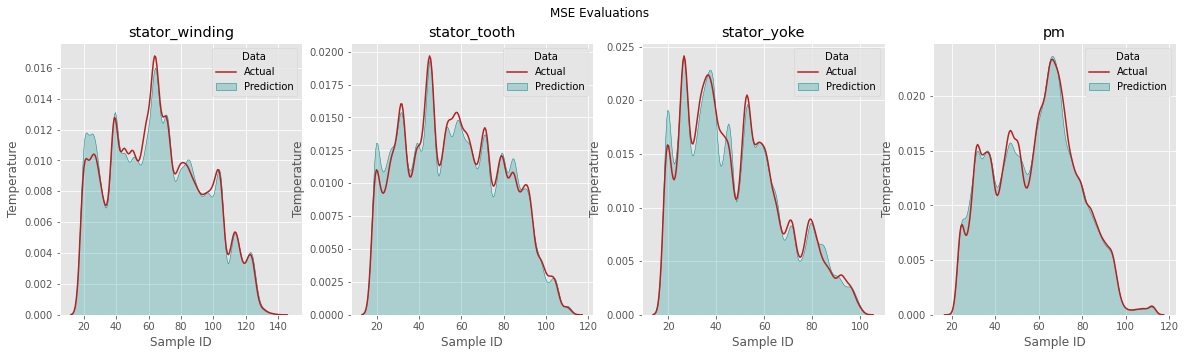

In [ ]:
#graphs to compare actual vs predicted temperatures for knn model
list_of_targets = ['stator_winding', 'stator_tooth', 'stator_yoke', 'pm']
pred_df = pd.DataFrame(knn_pred, columns = ['stator_winding', 'stator_tooth', 'stator_yoke', 'pm'])

plt.style.use('ggplot') 

fig, axs = plt.subplots(1,4, figsize=(20,5), squeeze=False)
plt.suptitle('MSE Evaluations')
y = 0

for x in list_of_targets:
  sb.kdeplot(y_test2[x], ax = axs[0, y], shade = True, legend = False, color = 'darkcyan')
  sb.kdeplot(pred_df[x], ax = axs[0, y], shade = False, legend = False, color = 'firebrick')
  axs[0,y].set_title(list_of_targets[y])
  axs[0, y].set_xlabel('Sample ID')
  axs[0, y].set_ylabel('Temperature')
  axs[0, y].legend(title = 'Data', loc = 'upper right', labels = ['Actual', 'Prediction'])
  y += 1

In [ ]:
fig.savefig('/content/drive/MyDrive/ESOF 3675 Project - Mark Grandell & Jack Fiorot/predvsactualgraphs.png')

In [ ]:
#making dataset to compare accuracy scores
models_df = pd.DataFrame({
    'Algorithm': ['Linear Regression','K-Nearest Neighbours', 'Decision Tree',  'Lasso Regression'],
    'MSE Score' : [mse2, knn_mse, dt_mse, l_mse],
    'MAE Score' : [mae2, knn_mae, dt_mae, l_mae],
    'R2 Score': [ r2s2, knn_r2, dt_r2, l_r2],
})

models_df.sort_values(by = ['MSE Score', 'MAE Score', 'R2 Score'], ascending = True)

,Algorithm,MSE Score,MAE Score,R2 Score
1,K-Nearest Neighbours,21.854359,2.122178,0.961317
2,Decision Tree,89.759898,4.661784,0.839772
0,Linear Regression,136.804169,8.492990,0.738854
3,Lasso Regression,184.271519,10.781583,0.634639


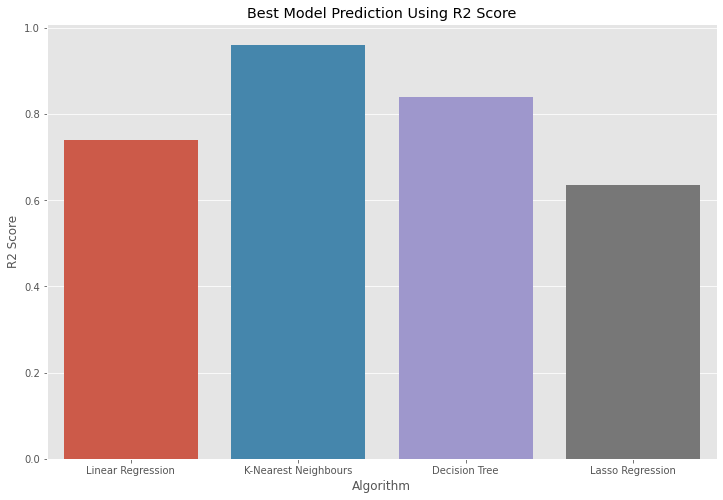

In [ ]:
#r2 score comparison graph
plt.style.use('ggplot') 
fig1 = plt.figure(figsize = (12, 8))
sb.barplot(x = 'Algorithm', y = 'R2 Score', data = models_df)
plt.title("Best Model Prediction Using R2 Score") 
plt.show()

In [ ]:
fig1.savefig('/content/drive/MyDrive/ESOF 3675 Project - Mark Grandell & Jack Fiorot/r2graph.png')

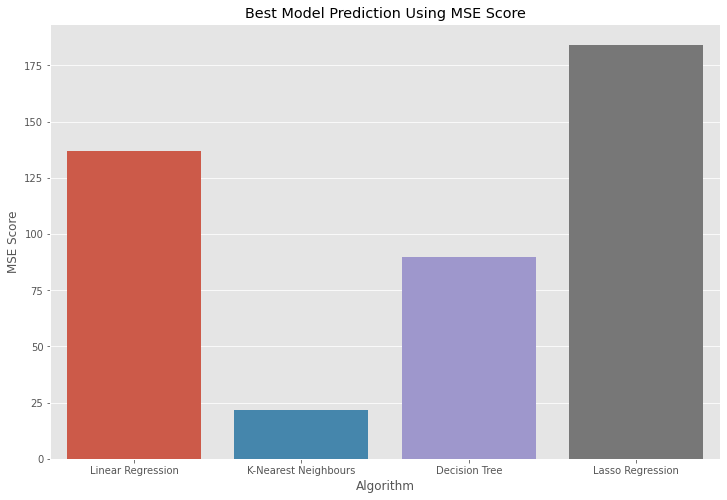

In [ ]:
#mse score comparison graph
plt.style.use('ggplot') 
fig2 = plt.figure(figsize = (12, 8))
sb.barplot(x = 'Algorithm', y = 'MSE Score', data = models_df)
plt.title("Best Model Prediction Using MSE Score") 
plt.show()

In [ ]:
fig2.savefig('/content/drive/MyDrive/ESOF 3675 Project - Mark Grandell & Jack Fiorot/msegraph.png')

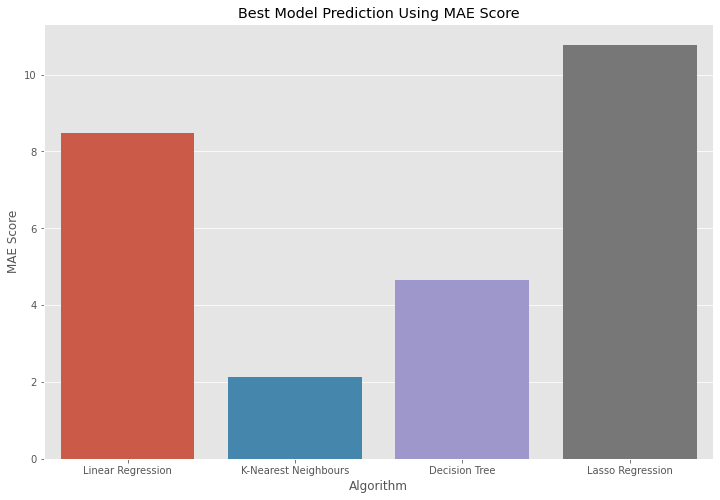

In [ ]:
#mae score comparison graph
plt.style.use('ggplot') 
fig3 = plt.figure(figsize = (12, 8))
sb.barplot(x = 'Algorithm', y = 'MAE Score', data = models_df)
plt.title("Best Model Prediction Using MAE Score") 
plt.show()

In [ ]:
fig3.savefig('/content/drive/MyDrive/ESOF 3675 Project - Mark Grandell & Jack Fiorot/maegraph.png')

# Final Submission Code

In [ ]:
#split data by profile id
x65 = df2[x2].loc[df2['profile_id'] == 65]
x72 = df2[x2].loc[df2['profile_id'] == 72]

st65 = df2['stator_tooth'].loc[df2['profile_id'] == 65]
sy65 = df2['stator_yoke'].loc[df2['profile_id'] == 65]
sw65 = df2['stator_winding'].loc[df2['profile_id'] == 65]
pm65 = df2['pm'].loc[df2['profile_id'] == 65]
st72 = df2['stator_tooth'].loc[df2['profile_id'] == 72]
sy72 = df2['stator_yoke'].loc[df2['profile_id'] == 72]
sw72 = df2['stator_winding'].loc[df2['profile_id'] == 72]
pm72 = df2['pm'].loc[df2['profile_id'] == 72]

#split dataset into train and test set
x_train_st65, x_test_st65, y_train_st65, y_test_st65 = train_test_split(x65, st65, test_size = 0.3, random_state = 100)
x_train_sy65, x_test_sy65, y_train_sy65, y_test_sy65 = train_test_split(x65, sy65, test_size = 0.3, random_state = 100)
x_train_sw65, x_test_sw65, y_train_sw65, y_test_sw65 = train_test_split(x65, sw65, test_size = 0.3, random_state = 100)
x_train_pm65, x_test_pm65, y_train_pm65, y_test_pm65 = train_test_split(x65, pm65, test_size = 0.3, random_state = 100)

x_train_st72, x_test_st72, y_train_st72, y_test_st72 = train_test_split(x72, st72, test_size = 0.3, random_state = 100)
x_train_sy72, x_test_sy72, y_train_sy72, y_test_sy72 = train_test_split(x72, sy72, test_size = 0.3, random_state = 100)
x_train_sw72, x_test_sw72, y_train_sw72, y_test_sw72 = train_test_split(x72, sw72, test_size = 0.3, random_state = 100)
x_train_pm72, x_test_pm72, y_train_pm72, y_test_pm72 = train_test_split(x72, pm72, test_size = 0.3, random_state = 100)

# KNN

# PID = 65

stator tooth 

In [ ]:
#make model
knn_st65 = KNeighborsRegressor()

In [ ]:
#fit data to model
knn_st65.fit(x_train_st65, y_train_st65)

KNeighborsRegressor()

In [ ]:
#run prediction
knn_st65_pred = knn_st65.predict(x_test_st65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_st65, knn_st65_pred)

44.209348557757934

In [ ]:
#r2 score calculation
r2_score(y_test_st65, knn_st65_pred)

0.8903161071692434

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_st65, knn_st65_pred)

3.5590949856008445

stator yoke

In [ ]:
#make model
knn_sy65 = KNeighborsRegressor()

In [ ]:
#fit data to model
knn_sy65.fit(x_train_sy65, y_train_sy65)

KNeighborsRegressor()

In [ ]:
#run prediction
knn_sy65_pred = knn_sy65.predict(x_test_sy65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sy65, knn_sy65_pred)

29.29210452024568

In [ ]:
#r2 score calculation
r2_score(y_test_sy65, knn_sy65_pred)

0.8954237042888116

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sy65, knn_sy65_pred)

2.869523265031118

stator winding

In [ ]:
#make model
knn_sw65 = KNeighborsRegressor()

In [ ]:
#fit data to model
knn_sw65.fit(x_train_sw65, y_train_sw65)

KNeighborsRegressor()

In [ ]:
#run prediction
knn_sw65_pred = knn_sw65.predict(x_test_sw65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sw65, knn_sw65_pred)

67.78514899864129

In [ ]:
#r2 score calculation
r2_score(y_test_sw65, knn_sw65_pred)

0.8901696230973886

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sw65, knn_sw65_pred)

4.433735781980795

pm

In [ ]:
#make model
knn_pm65 = KNeighborsRegressor()

In [ ]:
#fit data to model
knn_pm65.fit(x_train_pm65, y_train_pm65)

KNeighborsRegressor()

In [ ]:
#run prediction
knn_pm65_pred = knn_pm65.predict(x_test_pm65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_pm65, knn_pm65_pred)

47.322324966740084

In [ ]:
#r2 score calculation
r2_score(y_test_pm65, knn_pm65_pred)

0.7688591898287699

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_pm65, knn_pm65_pred)

3.867430033870014

# PID = 72

stator tooth 

In [ ]:
#make model
knn_st72 = KNeighborsRegressor()

In [ ]:
#fit data to model
knn_st72.fit(x_train_st72, y_train_st72)

KNeighborsRegressor()

In [ ]:
#run prediction
knn_st72_pred = knn_st72.predict(x_test_st72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_st72, knn_st72_pred)

60.58554576695133

In [ ]:
#r2 score calculation
r2_score(y_test_st72, knn_st72_pred)

0.855954789287401

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_st72, knn_st72_pred)

4.0292348006926675

stator yoke

In [ ]:
#make model
knn_sy72 = KNeighborsRegressor()

In [ ]:
#fit data to model
knn_sy72.fit(x_train_sy72, y_train_sy72)

KNeighborsRegressor()

In [ ]:
#run prediction
knn_sy72_pred = knn_sy72.predict(x_test_sy72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sy72, knn_sy72_pred)

43.1108975326591

In [ ]:
#r2 score calculation
r2_score(y_test_sy72, knn_sy72_pred)

0.8982223505775718

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sy72, knn_sy72_pred)

3.2266806663019554

stator winding

In [ ]:
#make model
knn_sw72 = KNeighborsRegressor()

In [ ]:
#fit data to model
knn_sw72.fit(x_train_sw72, y_train_sw72)

KNeighborsRegressor()

In [ ]:
#run prediction
knn_sw72_pred = knn_sw72.predict(x_test_sw72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sw72, knn_sw72_pred)

88.12345375988485

In [ ]:
#r2 score calculation
r2_score(y_test_sw72, knn_sw72_pred)

0.8208336001754619

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sw72, knn_sw72_pred)

5.037428612923383

pm

In [ ]:
#make model
knn_pm72 = KNeighborsRegressor()

In [ ]:
#fit data to model
knn_pm72.fit(x_train_pm72, y_train_pm72)

KNeighborsRegressor()

In [ ]:
#run prediction
knn_pm72_pred = knn_pm72.predict(x_test_pm72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_pm72, knn_pm72_pred)

31.630156347036863

In [ ]:
#r2 score calculation
r2_score(y_test_pm72, knn_pm72_pred)

0.621822763089402

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_pm72, knn_pm72_pred)

2.9063100843352

# linreg

# PID = 65

stator tooth 

In [ ]:
#make model
lr_st65 = LinearRegression()

In [ ]:
#fit data to model
lr_st65.fit(x_train_st65, y_train_st65)

LinearRegression()

In [ ]:
#run prediction
lr_st65_pred = lr_st65.predict(x_test_st65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_st65, lr_st65_pred)

69.29923143980993

In [ ]:
#r2 score calculation
r2_score(y_test_st65, lr_st65_pred)

0.8280678245107487

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_st65, lr_st65_pred)

6.40331672171581

stator yoke

In [ ]:
#make model
lr_sy65 = LinearRegression()

In [ ]:
#fit data to model
lr_sy65.fit(x_train_sy65, y_train_sy65)

LinearRegression()

In [ ]:
#run prediction
lr_sy65_pred = lr_sy65.predict(x_test_sy65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sy65, lr_sy65_pred)

29.470521545097213

In [ ]:
#r2 score calculation
r2_score(y_test_sy65, lr_sy65_pred)

0.8947867342978746

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sy65, lr_sy65_pred)

4.1295430331445155

stator winding

In [ ]:
#make model
lr_sw65 = LinearRegression()

In [ ]:
#fit data to model
lr_sw65.fit(x_train_sw65, y_train_sw65)

LinearRegression()

In [ ]:
#run prediction
lr_sw65_pred = lr_sw65.predict(x_test_sw65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sw65, lr_sw65_pred)

125.84155476710627

In [ ]:
#r2 score calculation
r2_score(y_test_sw65, lr_sw65_pred)

0.7961024561536489

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sw65, lr_sw65_pred)

8.634380313189427

pm

In [ ]:
#make model
lr_pm65 = LinearRegression()

In [ ]:
#fit data to model
lr_pm65.fit(x_train_pm65, y_train_pm65)

LinearRegression()

In [ ]:
#run prediction
lr_pm65_pred = lr_pm65.predict(x_test_pm65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_pm65, lr_pm65_pred)

77.74636982684623

In [ ]:
#r2 score calculation
r2_score(y_test_pm65, lr_pm65_pred)

0.6202562126379132

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_pm65, lr_pm65_pred)

7.303289363957489

# PID = 72

stator tooth 

In [ ]:
#make model
lr_st72 = LinearRegression()

In [ ]:
#fit data to model
lr_st72.fit(x_train_st72, y_train_st72)

LinearRegression()

In [ ]:
#run prediction
lr_st72_pred = lr_st72.predict(x_test_st72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_st72, lr_st72_pred)

96.24108235485863

In [ ]:
#r2 score calculation
r2_score(y_test_st72, lr_st72_pred)

0.7711819409807754

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_st72, lr_st72_pred)

7.13300236832572

stator yoke

In [ ]:
#make model
lr_sy72 = LinearRegression()

In [ ]:
#fit data to model
lr_sy72.fit(x_train_sy72, y_train_sy72)

LinearRegression()

In [ ]:
#run prediction
lr_sy72_pred = lr_sy72.predict(x_test_sy72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sy72, lr_sy72_pred)

48.76774308565126

In [ ]:
#r2 score calculation
r2_score(y_test_sy72, lr_sy72_pred)

0.8848674803132008

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sy72, lr_sy72_pred)

4.858979813100249

stator winding

In [ ]:
#make model
lr_sw72 = LinearRegression()

In [ ]:
#fit data to model
lr_sw72.fit(x_train_sw72, y_train_sw72)

LinearRegression()

In [ ]:
#run prediction
lr_sw72_pred = lr_sw72.predict(x_test_sw72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sw72, lr_sw72_pred)

154.5256833413706

In [ ]:
#r2 score calculation
r2_score(y_test_sw72, lr_sw72_pred)

0.685829263567709

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sw72, lr_sw72_pred)

9.303239723879297

pm

In [ ]:
#make model
lr_pm72 = LinearRegression()

In [ ]:
#fit data to model
lr_pm72.fit(x_train_pm72, y_train_pm72)

LinearRegression()

In [ ]:
#run prediction
lr_pm72_pred = lr_pm72.predict(x_test_pm72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_pm72, lr_pm72_pred)

63.95127160444318

In [ ]:
#r2 score calculation
r2_score(y_test_pm72, lr_pm72_pred)

0.2353842666176652

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_pm72, lr_pm72_pred)

6.392346494936288

# DT

# PID = 65

stator tooth 

In [ ]:
#make model
dt_st65 = tree.DecisionTreeRegressor()

In [ ]:
#fit data to model
dt_st65.fit(x_train_st65, y_train_st65)

DecisionTreeRegressor()

In [ ]:
#run prediction
dt_st65_pred = dt_st65.predict(x_test_st65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_st65, dt_st65_pred)

3.6748513112885046

In [ ]:
#r2 score calculation
r2_score(y_test_st65, dt_st65_pred)

0.9908826524129906

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_st65, dt_st65_pred)

0.5747948989499828

stator yoke

In [ ]:
#make model
dt_sy65 = tree.DecisionTreeRegressor()

In [ ]:
#fit data to model
dt_sy65.fit(x_train_sy65, y_train_sy65)

DecisionTreeRegressor()

In [ ]:
#run prediction
dt_sy65_pred = dt_sy65.predict(x_test_sy65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sy65, dt_sy65_pred)

1.4728880800061033

In [ ]:
#r2 score calculation
r2_score(y_test_sy65, dt_sy65_pred)

0.994741614440924

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sy65, dt_sy65_pred)

0.3651663613660332

stator winding

In [ ]:
#make model
dt_sw65 = tree.DecisionTreeRegressor()

In [ ]:
#fit data to model
dt_sw65.fit(x_train_sw65, y_train_sw65)

DecisionTreeRegressor()

In [ ]:
#run prediction
dt_sw65_pred = dt_sw65.predict(x_test_sw65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sw65, dt_sw65_pred)

6.020098397532065

In [ ]:
#r2 score calculation
r2_score(y_test_sw65, dt_sw65_pred)

0.9902458033100288

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sw65, dt_sw65_pred)

0.8223722042125485

pm

In [ ]:
#make model
dt_pm65 = tree.DecisionTreeRegressor()

In [ ]:
#fit data to model
dt_pm65.fit(x_train_pm65, y_train_pm65)

DecisionTreeRegressor()

In [ ]:
#run prediction
dt_pm65_pred = dt_pm65.predict(x_test_pm65)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_pm65, dt_pm65_pred)

4.948463927165054

In [ ]:
#r2 score calculation
r2_score(y_test_pm65, dt_pm65_pred)

0.9758297598008564

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_pm65, dt_pm65_pred)

1.043293084588343

# PID = 72

stator tooth 

In [ ]:
#make model
dt_st72 = tree.DecisionTreeRegressor()

In [ ]:
#fit data to model
dt_st72.fit(x_train_st72, y_train_st72)

DecisionTreeRegressor()

In [ ]:
#run prediction
dt_st72_pred = dt_st72.predict(x_test_st72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_st72, dt_st72_pred)

7.290584970613931

In [ ]:
#r2 score calculation
r2_score(y_test_st72, dt_st72_pred)

0.9826662641226375

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_st72, dt_st72_pred)

0.6222138632332167

stator yoke

In [ ]:
#make model
dt_sy72 = tree.DecisionTreeRegressor()

In [ ]:
#fit data to model
dt_sy72.fit(x_train_sy72, y_train_sy72)

DecisionTreeRegressor()

In [ ]:
#run prediction
dt_sy72_pred = dt_sy72.predict(x_test_sy72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sy72, dt_sy72_pred)

3.3601280396725937

In [ ]:
#r2 score calculation
r2_score(y_test_sy72, dt_sy72_pred)

0.9920672972911967

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sy72, dt_sy72_pred)

0.40889322030023056

stator winding

In [ ]:
#make model
dt_sw72 = tree.DecisionTreeRegressor()

In [ ]:
#fit data to model
dt_sw72.fit(x_train_sw72, y_train_sw72)

DecisionTreeRegressor()

In [ ]:
#run prediction
dt_sw72_pred = dt_sw72.predict(x_test_sw72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_sw72, dt_sw72_pred)

13.635364306079703

In [ ]:
#r2 score calculation
r2_score(y_test_sw72, dt_sw72_pred)

0.9722775376045417

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_sw72, dt_sw72_pred)

1.0333388095194134

pm

In [ ]:
#make model
dt_pm72 = tree.DecisionTreeRegressor()

In [ ]:
#fit data to model
dt_pm72.fit(x_train_pm72, y_train_pm72)

DecisionTreeRegressor()

In [ ]:
#run prediction
dt_pm72_pred = dt_pm72.predict(x_test_pm72)

In [ ]:
#mean squared error calculation
mean_squared_error(y_test_pm72, dt_pm72_pred)

1.7736380531285978

In [ ]:
#r2 score calculation
r2_score(y_test_pm72, dt_pm72_pred)

0.9787939860033446

In [ ]:
#mean absolute error calculation
mean_absolute_error(y_test_pm72, dt_pm72_pred)

0.2974590780558178